# 5. Optim API


In this tutorial, we implement several optimizers object oriented programming fashion.

### TL,DR
Numpy implementation of many optimizers:
+ SGD
+ Momentum
+ AdaGrad
+ RMSprob
+ ADAM


In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from net import Net
from gates import Conv,Reshape,Linear,Softmax
from optim import Optim, SGD

In [2]:
# Digit Recognition
digits = datasets.load_digits()
X=np.expand_dims(digits.images, axis=1)
y=digits.target
print(X.shape, y.shape)

(1797, 1, 8, 8) (1797,)


In [3]:
num_epoch=10
num_run=5

In [4]:
def benchmarking(num_epoch,num_run,opt):
    for i in range(num_run):
        net=Net(optimizer=opt(),verbose=1)
        net.add_from_iter([Conv(in_channels=1,out_channels=2,kernel_size=(2,2),stride=1),
                           Reshape(flatten=True),
                           Linear(in_features=98,out_features=10),
                           Softmax()])
        net.train(X,y,epoch=num_epoch)
        plt.xlabel('Epochs')
        plt.ylabel('Cross Entropy loss')
        plt.plot(net.losses)

Training starts.
[Epoch:1]-[Avg.Loss:1.523]-[Avg.Acc:0.635]
[Epoch:2]-[Avg.Loss:0.780]-[Avg.Acc:0.866]
[Epoch:3]-[Avg.Loss:0.581]-[Avg.Acc:0.885]
[Epoch:4]-[Avg.Loss:0.486]-[Avg.Acc:0.895]
[Epoch:5]-[Avg.Loss:0.428]-[Avg.Acc:0.910]
[Epoch:6]-[Avg.Loss:0.387]-[Avg.Acc:0.914]
[Epoch:7]-[Avg.Loss:0.357]-[Avg.Acc:0.920]
[Epoch:8]-[Avg.Loss:0.333]-[Avg.Acc:0.923]
[Epoch:9]-[Avg.Loss:0.314]-[Avg.Acc:0.925]
[Epoch:10]-[Avg.Loss:0.297]-[Avg.Acc:0.934]
Training starts.
[Epoch:1]-[Avg.Loss:1.624]-[Avg.Acc:0.536]
[Epoch:2]-[Avg.Loss:0.795]-[Avg.Acc:0.875]
[Epoch:3]-[Avg.Loss:0.580]-[Avg.Acc:0.890]
[Epoch:4]-[Avg.Loss:0.473]-[Avg.Acc:0.903]
[Epoch:5]-[Avg.Loss:0.415]-[Avg.Acc:0.910]
[Epoch:6]-[Avg.Loss:0.371]-[Avg.Acc:0.924]
[Epoch:7]-[Avg.Loss:0.337]-[Avg.Acc:0.928]
[Epoch:8]-[Avg.Loss:0.313]-[Avg.Acc:0.932]
[Epoch:9]-[Avg.Loss:0.297]-[Avg.Acc:0.928]
[Epoch:10]-[Avg.Loss:0.278]-[Avg.Acc:0.937]
Training starts.
[Epoch:1]-[Avg.Loss:1.781]-[Avg.Acc:0.524]
[Epoch:2]-[Avg.Loss:1.030]-[Avg.Acc:0.871]
[

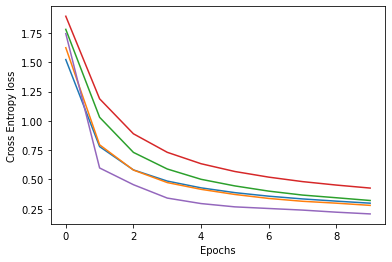

In [5]:
benchmarking(num_epoch=num_epoch,num_run=num_run,opt=SGD)

# Momentum

In [6]:
class Momentum(Optim):
    def __init__(self,learning_rate=.001):
        super().__init__()
        self.learning_rate=learning_rate
         # mu is often set to ~.5,.9 or .99. 
        # Sometimes annealed over time, e.g. from .5 >.99
        self.mu=0.99
        self.cache = dict()  
    
    def update(self,gates):
        for g in gates:
            if g.param_size==0:
                continue                
            if not (g in self.cache):
                self.cache[g]=(np.zeros(g.weight.shape),np.zeros(g.bias.shape))

            # 1. Get velocities.
            v_weight,v_bias= self.cache[g] 
            
            # 2.Integrate velocity of weight.
            v_weight= self.mu * v_weight - self.learning_rate * g.dweight            
            g.weight += v_weight
            
            # 3. Integrate velocity of bias.
            v_bias= self.mu * v_bias - self.learning_rate * g.dbias            
            g.bias += v_bias   
            
            # 4. Update velocities.
            self.cache[g]=(v_weight,v_bias)

Training starts.
[Epoch:1]-[Avg.Loss:2.922]-[Avg.Acc:0.349]
[Epoch:2]-[Avg.Loss:1.732]-[Avg.Acc:0.672]
[Epoch:3]-[Avg.Loss:1.021]-[Avg.Acc:0.816]
[Epoch:4]-[Avg.Loss:0.739]-[Avg.Acc:0.864]
[Epoch:5]-[Avg.Loss:0.798]-[Avg.Acc:0.861]
[Epoch:6]-[Avg.Loss:0.531]-[Avg.Acc:0.909]
[Epoch:7]-[Avg.Loss:0.462]-[Avg.Acc:0.919]
[Epoch:8]-[Avg.Loss:0.376]-[Avg.Acc:0.933]
[Epoch:9]-[Avg.Loss:0.508]-[Avg.Acc:0.910]
[Epoch:10]-[Avg.Loss:0.533]-[Avg.Acc:0.905]
Training starts.
[Epoch:1]-[Avg.Loss:1.151]-[Avg.Acc:0.635]
[Epoch:2]-[Avg.Loss:0.240]-[Avg.Acc:0.919]
[Epoch:3]-[Avg.Loss:0.212]-[Avg.Acc:0.939]
[Epoch:4]-[Avg.Loss:0.172]-[Avg.Acc:0.955]
[Epoch:5]-[Avg.Loss:0.166]-[Avg.Acc:0.954]
[Epoch:6]-[Avg.Loss:0.142]-[Avg.Acc:0.966]
[Epoch:7]-[Avg.Loss:0.147]-[Avg.Acc:0.963]
[Epoch:8]-[Avg.Loss:0.139]-[Avg.Acc:0.968]
[Epoch:9]-[Avg.Loss:0.138]-[Avg.Acc:0.965]
[Epoch:10]-[Avg.Loss:0.127]-[Avg.Acc:0.968]
Training starts.
[Epoch:1]-[Avg.Loss:1.097]-[Avg.Acc:0.643]
[Epoch:2]-[Avg.Loss:0.264]-[Avg.Acc:0.914]
[

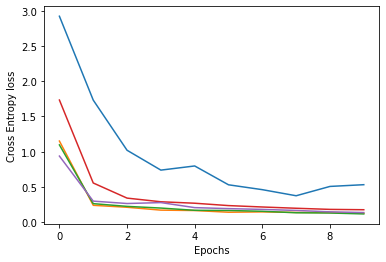

In [7]:
benchmarking(num_epoch=num_epoch,num_run=num_run,opt=Momentum)

# Adagrad

In [8]:
class AdaGrad(Optim):
    """
    
    Adagrad can be considered as 
    scaled SGD.
    
    # 1- Added element-wise scaling of the gradient based on the
    # historical sum of squares in each dim.
    cache += dx**2
    
    x
    """
    def __init__(self,learning_rate=.001):
        super().__init__()
        self.learning_rate=learning_rate
        self.cache = dict()  
    
    def update(self,gates):
        for g in gates:
            if g.param_size==0:
                continue
                
            if not (g in self.cache):
                self.cache[g]=(np.zeros(g.weight.shape),np.zeros(g.bias.shape))

            # 1. Get caches
            cache_weight,cache_bias=self.cache[g]
            
            # 2. Update caches
            cache_weight += g.dweight ** 2
            cache_bias += g.dbias ** 2
            
            # 3. Update parameters with updated caches.
            g.weight += - self.learning_rate * g.dweight / (np.sqrt(cache_weight) + 1e-7)
            g.bias   += - self.learning_rate * g.dbias / (np.sqrt(cache_bias) + 1e-7)

            self.cache[g]=(cache_weight,cache_bias)

Training starts.
[Epoch:1]-[Avg.Loss:1.705]-[Avg.Acc:0.618]
[Epoch:2]-[Avg.Loss:1.100]-[Avg.Acc:0.880]
[Epoch:3]-[Avg.Loss:0.865]-[Avg.Acc:0.904]
[Epoch:4]-[Avg.Loss:0.729]-[Avg.Acc:0.913]
[Epoch:5]-[Avg.Loss:0.642]-[Avg.Acc:0.919]
[Epoch:6]-[Avg.Loss:0.579]-[Avg.Acc:0.924]
[Epoch:7]-[Avg.Loss:0.530]-[Avg.Acc:0.929]
[Epoch:8]-[Avg.Loss:0.491]-[Avg.Acc:0.933]
[Epoch:9]-[Avg.Loss:0.460]-[Avg.Acc:0.936]
[Epoch:10]-[Avg.Loss:0.434]-[Avg.Acc:0.937]
Training starts.
[Epoch:1]-[Avg.Loss:1.507]-[Avg.Acc:0.603]
[Epoch:2]-[Avg.Loss:0.877]-[Avg.Acc:0.871]
[Epoch:3]-[Avg.Loss:0.681]-[Avg.Acc:0.886]
[Epoch:4]-[Avg.Loss:0.577]-[Avg.Acc:0.907]
[Epoch:5]-[Avg.Loss:0.512]-[Avg.Acc:0.912]
[Epoch:6]-[Avg.Loss:0.462]-[Avg.Acc:0.918]
[Epoch:7]-[Avg.Loss:0.427]-[Avg.Acc:0.926]
[Epoch:8]-[Avg.Loss:0.399]-[Avg.Acc:0.928]
[Epoch:9]-[Avg.Loss:0.378]-[Avg.Acc:0.933]
[Epoch:10]-[Avg.Loss:0.358]-[Avg.Acc:0.932]
Training starts.
[Epoch:1]-[Avg.Loss:1.790]-[Avg.Acc:0.612]
[Epoch:2]-[Avg.Loss:1.243]-[Avg.Acc:0.855]
[

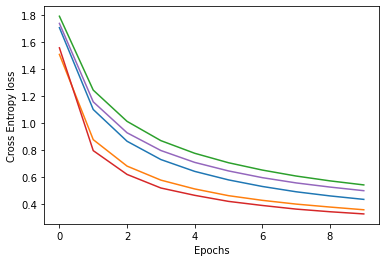

In [9]:
benchmarking(num_epoch=num_epoch,num_run=num_run,opt=AdaGrad)

# RMSprob

In [10]:
class RMSProb(Optim):
    def __init__(self,learning_rate=.001):
        super().__init__()
        self.learning_rate=learning_rate
        self.decay_rate = .99
        self.cache = dict()        
    def update(self,gates):
        for g in gates:
            if g.param_size==0:
                continue
            if not (g in self.cache):
                self.cache[g]=(np.zeros(g.weight.shape),np.zeros(g.bias.shape))

            # 1. Get caches.
            cache_weight,cache_bias=self.cache[g]

            # 2. Update caches with leaky counter
            # Recall from Adagrad
            #cache_weight += g.dweight ** 2
            #cache_bias += g.dbias ** 2
            
            cache_weight = self.decay_rate * cache_weight + (1 - self.decay_rate) * g.dweight ** 2
            cache_bias = self.decay_rate * cache_bias + (1 - self.decay_rate) * g.dbias ** 2

            g.weight += - self.learning_rate * g.dweight / (np.sqrt(cache_weight) + 1e-7)
            g.bias   += - self.learning_rate * g.dbias / (np.sqrt(cache_bias) + 1e-7)

            self.cache[g]=(cache_weight,cache_bias)

Training starts.
[Epoch:1]-[Avg.Loss:1.976]-[Avg.Acc:0.495]
[Epoch:2]-[Avg.Loss:0.291]-[Avg.Acc:0.908]
[Epoch:3]-[Avg.Loss:0.236]-[Avg.Acc:0.933]
[Epoch:4]-[Avg.Loss:0.207]-[Avg.Acc:0.941]
[Epoch:5]-[Avg.Loss:0.187]-[Avg.Acc:0.946]
[Epoch:6]-[Avg.Loss:0.174]-[Avg.Acc:0.951]
[Epoch:7]-[Avg.Loss:0.160]-[Avg.Acc:0.955]
[Epoch:8]-[Avg.Loss:0.147]-[Avg.Acc:0.962]
[Epoch:9]-[Avg.Loss:0.138]-[Avg.Acc:0.967]
[Epoch:10]-[Avg.Loss:0.134]-[Avg.Acc:0.967]
Training starts.
[Epoch:1]-[Avg.Loss:2.099]-[Avg.Acc:0.499]
[Epoch:2]-[Avg.Loss:0.353]-[Avg.Acc:0.899]
[Epoch:3]-[Avg.Loss:0.203]-[Avg.Acc:0.941]
[Epoch:4]-[Avg.Loss:0.171]-[Avg.Acc:0.958]
[Epoch:5]-[Avg.Loss:0.158]-[Avg.Acc:0.960]
[Epoch:6]-[Avg.Loss:0.146]-[Avg.Acc:0.965]
[Epoch:7]-[Avg.Loss:0.133]-[Avg.Acc:0.968]
[Epoch:8]-[Avg.Loss:0.129]-[Avg.Acc:0.967]
[Epoch:9]-[Avg.Loss:0.118]-[Avg.Acc:0.973]
[Epoch:10]-[Avg.Loss:0.118]-[Avg.Acc:0.971]
Training starts.
[Epoch:1]-[Avg.Loss:3.624]-[Avg.Acc:0.336]
[Epoch:2]-[Avg.Loss:0.628]-[Avg.Acc:0.846]
[

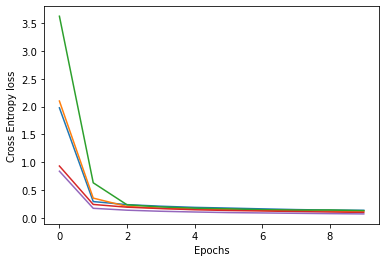

In [11]:
benchmarking(num_epoch=num_epoch,num_run=num_run,opt=RMSProb)

# ADAM

In [12]:
class ADAM(Optim):
    def __init__(self,learning_rate=.001):
        super().__init__()
        self.learning_rate=learning_rate
        self.cache = dict() # key:gate, val: mu and v
        self.beta1 = 0.9
        self.beta2=.999
        
        self.t=1 # counter
        
    def init_cache(self,weight_shape,bias_shape):
        return (np.zeros(weight_shape),np.zeros(weight_shape),
                np.zeros(bias_shape),np.zeros(bias_shape))
    
    def update_weight(self,g):
        m,v,_,_=self.cache[g]
        
        m=self.beta1 * m + (1 - self.beta1) * g.dweight
        v=self.beta2 * v + (1 - self.beta2) * (g.dweight**2)

        mt=m/(1-self.beta1**self.t)
        vt=v/(1-self.beta2**self.t)

    
        g.weight += -self.learning_rate * mt / (np.sqrt(vt) + 1e-8)
        self.cache[g]=m,v,_,_

    def update_bias(self,g):
        _,_,m,v=self.cache[g]
        
        m=self.beta1 * m + (1 - self.beta1) * g.dbias
        v=self.beta2 * v + (1 - self.beta2) * (g.dbias**2)

        mt=m/(1-self.beta1**self.t)
        vt=v/(1-self.beta2**self.t)
        
        
        g.bias += -self.learning_rate * mt / (np.sqrt(vt) + 1e-8)
        self.cache[g]=_,_,m,v
        
    def update(self,gates):
        for g in gates:
            if g.param_size==0:
                continue    
            if not (g in self.cache):
                self.cache[g]=self.init_cache(g.weight.shape,g.bias.shape)
            
            self.update_weight(g)
            self.update_bias(g)
            self.t+=1

Training starts.
[Epoch:1]-[Avg.Loss:1.892]-[Avg.Acc:0.434]
[Epoch:2]-[Avg.Loss:1.229]-[Avg.Acc:0.772]
[Epoch:3]-[Avg.Loss:0.966]-[Avg.Acc:0.845]
[Epoch:4]-[Avg.Loss:0.796]-[Avg.Acc:0.869]
[Epoch:5]-[Avg.Loss:0.688]-[Avg.Acc:0.881]
[Epoch:6]-[Avg.Loss:0.601]-[Avg.Acc:0.893]
[Epoch:7]-[Avg.Loss:0.537]-[Avg.Acc:0.904]
[Epoch:8]-[Avg.Loss:0.494]-[Avg.Acc:0.907]
[Epoch:9]-[Avg.Loss:0.452]-[Avg.Acc:0.910]
[Epoch:10]-[Avg.Loss:0.421]-[Avg.Acc:0.915]
Training starts.
[Epoch:1]-[Avg.Loss:1.709]-[Avg.Acc:0.507]
[Epoch:2]-[Avg.Loss:1.161]-[Avg.Acc:0.828]
[Epoch:3]-[Avg.Loss:0.924]-[Avg.Acc:0.871]
[Epoch:4]-[Avg.Loss:0.768]-[Avg.Acc:0.888]
[Epoch:5]-[Avg.Loss:0.659]-[Avg.Acc:0.900]
[Epoch:6]-[Avg.Loss:0.577]-[Avg.Acc:0.914]
[Epoch:7]-[Avg.Loss:0.516]-[Avg.Acc:0.916]
[Epoch:8]-[Avg.Loss:0.468]-[Avg.Acc:0.921]
[Epoch:9]-[Avg.Loss:0.430]-[Avg.Acc:0.927]
[Epoch:10]-[Avg.Loss:0.399]-[Avg.Acc:0.931]
Training starts.
[Epoch:1]-[Avg.Loss:1.889]-[Avg.Acc:0.465]
[Epoch:2]-[Avg.Loss:1.377]-[Avg.Acc:0.758]
[

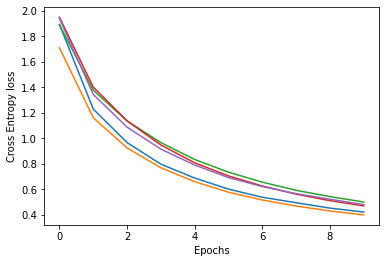

In [13]:
benchmarking(num_epoch=num_epoch,num_run=num_run,opt=ADAM)